# Sesión 06: Comparación de grupos
Facilidad 😀😀 (muchos conceptos teóricos)  
Uso de código: 🐍🐍🐍 (varias pruebas estadísticas)

## 6.1  Pruebas A/B
En el área de negocios, especialmente en innovación digital, es común realizar pruebas A/B para evaluar las respuestas de los usuarios a diferentes alternativas en el diseño de un sitio o una interfaz.  
Entre sus características básicas está que los usuarios son asignados al azar a un grupo de control (A) o a un grupo experimental (B). A cada grupo se les muestra una alternativa diferente y se recopilan diversas métricas. Finalmente, analizando los resultados, se concluye qué alternativa tuvo mejor desempeño.  
En la siguiente liga se muestran varios ejemplos de aplicaciones prácticas:
https://goodui.org/leaks/. Este tipo de experimentos ejemplifica la aplicación de técnicas que veremos en esta sesión relacionadas con la comparación de dos o más grupos

El archivo "cookie_cats.csv" contiene información de 90,189 jugadores. Cuando un jugador instala el juego empieza en el nivel 30, sin embargo, en la empresa que diseñó el juego han propuesto que el jugador empiece en el nivel 40. Para evaluar ambas opciones se diseñó una prueba A/B en la cual los jugadores fueron asignados aleatoriamente para comenzar en el nivel 30 (control) o en el nivel 40 (tratamiento).

Las variables en el dataset son:

- userid: identificador del jugador.
- version: gate30, empieza en el nivel 30; gate40: empieza en el nivel 40.
- sum_gamerounds: número de rondas jugadas durante los primeros 14 días.
- retention_1: el jugador jugó un día después de instalar el juego.
- retention_7_ el jugador jugó después de 7 días de haber instalado el juego.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/b07_cookie_cats.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [3]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


<Axes: >

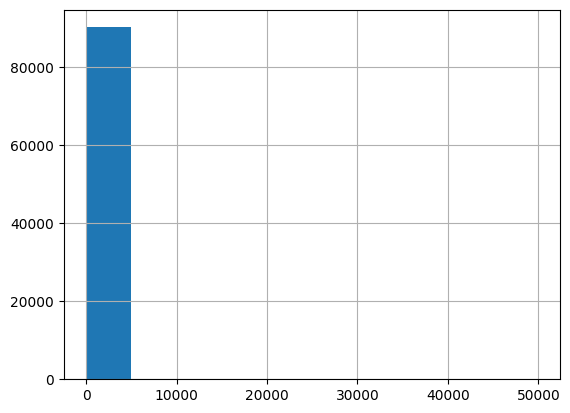

In [4]:
df['sum_gamerounds'].hist()

In [5]:
# Eliminación de datos atípicos
df = df[df['sum_gamerounds']<1000]

## 6.2 Prueba z para dos proporciones
Realizaremos una prueba z para comparar dos proporciones. Las pruebas de hipótesis pueden ser bilaterales (de dos colas) o unilaterales (de una cola). Utilizaremos una prueba bilateral, por lo tanto, las hipótesis se plantean como:
- H<sub>0</sub>: p=p<sub>0</sub> (Hipótesis nula)
- H<sub>1</sub>: p ≠ p<sub>0</sub> (Hipótesis alternativa)

Para calcular las proporciones conviene obtener una tabla con el conteo de cada caso. Realicemos una tabla de contigencia o tabla cruzada. 

In [6]:
# Crear una tabla de contingencia
# se crea un tabla crusa, fila x columna
tabla_contingencia = pd.crosstab(df['version'], df['retention_1'])
tabla_contingencia

retention_1,False,True
version,,
gate_30,24663,19984
gate_40,25368,20056


Utilizaremos estos conteos como datos para realizar la prueba z

In [7]:
from statsmodels.stats.proportion import proportions_ztest
# Prueba z
# .sum(axis=1) suma por fila [0][1]
valor_z, p_value  = proportions_ztest(tabla_contingencia[True], 
                                      tabla_contingencia.sum(axis=1))

# Imprimir el resultado
# El p-valor indica el criterio de la prueba
# si el p-valor es menor que el nivel de significancia (p=0.05) se rechaza H0
print("Valor z: \t", valor_z)
print("Valor p: \t", p_value, " No se rechaza la hipostesis nula")

Valor z: 	 1.8333709789201535
Valor p: 	 0.06674742038798634  No se rechaza la hipostesis nula


En las pruebas estadísticas aplicaremos el criterio del p-valor, esto es, rechazar la hipótesis nula si el p-valor es menor al nivel de significancia (típicamente se utiliza 0.05)

In [8]:
# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay evidencia de que hay diferencias significativas en las proporciones.")
else:
    print("No se rechaza la hipótesis nula: no hay suficiente evidencia para afirmar que hay diferencias significativas en las proporciones.")

No se rechaza la hipótesis nula: no hay suficiente evidencia para afirmar que hay diferencias significativas en las proporciones.


#### Ejerciocio 7mo dia

In [9]:
# Crear una tabla de contingencia
# se crea un tabla crusa, fila x columna
tabla_contingencia_7 = pd.crosstab(df['version'], df['retention_7'])
tabla_contingencia_7

retention_7,False,True
version,,
gate_30,36198,8449
gate_40,37208,8216


In [10]:
from statsmodels.stats.proportion import proportions_ztest
# Prueba z
# .sum(axis=1) suma por fila [0][1]
valor_z_7, p_value_7  = proportions_ztest(tabla_contingencia_7[True], 
                                      tabla_contingencia_7.sum(axis=1))

# Imprimir el resultado
# El p-valor indica el criterio de la prueba
# si el p-valor es menor que el nivel de significancia (p=0.05) se rechaza H0
print("Valor z: \t", valor_z_7)
print("Valor p: \t", p_value_7)
alpha = 0.05
if p_value_7 < alpha:
    print("Se rechaza la hipótesis nula: hay evidencia de que hay diferencias significativas en las proporciones.")
else:
    print("No se rechaza la hipótesis nula: no hay suficiente evidencia para afirmar que hay diferencias significativas en las proporciones.")

Valor z: 	 3.2330041084455217
Valor p: 	 0.0012249580100787204
Se rechaza la hipótesis nula: hay evidencia de que hay diferencias significativas en las proporciones.


## 6.3 Prueba t para dos muestras independientes

Los promedios también son una métrica comúnmente utilizada en las pruebas A/B. Comparemos las rondas de juego en promedio por cada grupo en el experimento.

In [11]:
df.groupby('version').agg({'sum_gamerounds':'mean'})

,sum_gamerounds
version,
gate_30,49.825789
gate_40,49.487760


In [12]:
from scipy.stats import ttest_ind

# Realizar la prueba t de dos muestras independientes
t_statistic, p_value = ttest_ind(df.loc[df['version'] == 'gate_30', 'sum_gamerounds'], 
                                 df.loc[df['version'] == 'gate_40', 'sum_gamerounds'])

# Imprimir los resultados
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)

# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay evidencia de diferencias significativas en las medias.")
else:
    print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas en las medias.")

Estadístico t: 0.5584128848228552
Valor p: 0.5765638644688713
No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas en las medias.


- En la prueba t es requisito que las variables tengan una distribucion normal o el que tamaño de muestra sea mayor a 30.
- Teorema de limite cental

## 6.4 Prueba Shapiro Wilk

Si la muestra es pequeña (p<30) se requiere evaluar la normalidad en la distribución de los datos. Existen varias pruebas para evaluar la normalidad de los datos. La prueba Shapiro-Wilk es una de las más utilizadas.  
- Hipótesis nula (H0): Los datos provienen de una distribución normal  
- Hipótesis alternativa (H1): Los datos no provienen de una distribución normal.  
Solo como ejercicio, aplicaremos la prueba Shapiro-Wilk

In [13]:
from scipy.stats import shapiro

df2 = df.head(100)

stat, p_value = shapiro(df2.loc[df2['version'] == 'gate_30', 'sum_gamerounds'])
print("Estadístico de prueba: \t", stat)
print("Valor p: \t", p_value)

# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula de normalidad en los datos")
else:
    print("No se puede rechazar la hipótesis nula de normalidad en los datos")

Estadístico de prueba: 	 0.630561351776123
Valor p: 	 3.438863360738509e-10
Se rechaza la hipótesis nula de normalidad en los datos


In [14]:
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


## 6.5 Prueba de Levene
Es recomendable también comparar la varianza entre ambos grupos. Para ello se realiza la prueba de Levene (prueba de homogeneidad de varianzas).

In [15]:
from scipy.stats import levene
stat, p_value = levene(df.loc[df['version'] == 'gate_30', 'sum_gamerounds'],
                       df.loc[df['version'] == 'gate_40', 'sum_gamerounds'])
print("Estadístico de prueba:", stat)
print("Valor p:", p_value)

Estadístico de prueba: 0.03880220384954784
Valor p: 0.8438414811744965


In [16]:
# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay evidencia de diferencias significativas en las varianzas.")
else:
    print("No se puede rechazar la hipótesis nula: no se rechaza el supuesto de igualdad de varianzas.")

No se puede rechazar la hipótesis nula: no se rechaza el supuesto de igualdad de varianzas.


## 6.6. Prueba Mann-Whitney
Una alternativa no paramétrica a la prueba t es la prueba de Mann-Whitney. Esto es recomendable cuando no se cumple el supuesto de normalidad de los datos.

In [17]:
from scipy.stats import mannwhitneyu

# Realizar la prueba de Mann-Whitney U
statistic, p_value = mannwhitneyu(df.loc[df['version'] == 'gate_30', 'sum_gamerounds'],
                                  df.loc[df['version'] == 'gate_40', 'sum_gamerounds'])

# Imprimir los resultados
print("Estadístico de prueba U:", statistic)
print("Valor p:", p_value)

Estadístico de prueba U: 1021921905.5
Valor p: 0.042826414935189544


In [18]:
# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay evidencia de diferencias significativas en la distribución.")
else:
    print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas en la distribución")

Se rechaza la hipótesis nula: hay evidencia de diferencias significativas en la distribución.


## 6.7 Comparación de más de dos grupos (ANOVA)



Una cadena de comida rápida planea agregar un nuevo producto a su menú, pero están indecisos entre tres posibles campañas de mercadotecnica. Como un experimento, el producto fue introducido en varias ubicaciones seleccionadas aleatoriamente utilizando diferentes campañas. Se registraron las ventas del nuevo producto por las primeras cuatro semanas. El archivo "b09_marketing.csv" contiene las siguientes variables:  
- MarketID: identificador del mercado
- MarketSize: tamaño del mercado de acuerdo a las ventas
- LocationID: identificador de la ubicación de la tienda
- AgeOfStore: antigüedad de la tienda en años
- Promotion: promoción (1 de 3) que fue probada
- week: semana en que se llevó a cabo la promoción.
- SalesInThousands: ventas para una ubicación específica (LocationID), promoción (Promotion) y semana (week).

In [19]:
df = pd.read_csv('data/b09_marketing.csv')

### 6.7.1. Supuesto de igualdad de varianzas

In [20]:
from scipy.stats import levene

statistic, pvalue = levene(df.loc[df['Promotion'] == 1, "SalesInThousands"],
                           df.loc[df['Promotion'] == 2, "SalesInThousands"],
                           df.loc[df['Promotion'] == 3, "SalesInThousands"])
# Imprimir los resultados
print("Estadístico de prueba de Levene:", statistic)
print("Valor p:", p_value)

Estadístico de prueba de Levene: 1.2696787527507418
Valor p: 0.042826414935189544


In [21]:
# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay evidencia de diferencias significativas en las varianzas.")
else:
    print("No se puede rechazar la hipótesis nula: no se rechaza el supuesto de igualdad de varianzas.")

Se rechaza la hipótesis nula: hay evidencia de diferencias significativas en las varianzas.


### 6.7.2 Supuesto de normalidad

In [22]:
for group in list(df["Promotion"].unique()):
    pvalue = shapiro(df.loc[df["Promotion"] == group, "SalesInThousands"])[1]
    print(group, 'p-value: ', pvalue)

3 p-value:  1.499518376135711e-08
2 p-value:  5.456247009760773e-09
1 p-value:  1.9772498305314912e-08


### 6.7.3 ANOVA

In [23]:
from scipy.stats import f_oneway

# Aplicar la prueba ANOVA
statistic, p_value = f_oneway(df.loc[df['Promotion'] == 1, "SalesInThousands"],
                              df.loc[df['Promotion'] == 2, "SalesInThousands"],
                              df.loc[df['Promotion'] == 3, "SalesInThousands"])

# Imprimir los resultados
print("Estadístico de prueba de ANOVA:", statistic)
print("Valor p:", p_value)

Estadístico de prueba de ANOVA: 21.953485793080677
Valor p: 6.765849261408714e-10


In [24]:
# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay al menos una diferencia significativa entre los grupos.")
else:
    print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar que hay diferencias significativas entre los grupos.")

Se rechaza la hipótesis nula: hay al menos una diferencia significativa entre los grupos.


In [25]:
from statsmodels.stats.multicomp import MultiComparison

comparison = MultiComparison(df["SalesInThousands"], df["Promotion"])
tukey = comparison.tukeyhsd(0.05)
print(tukey.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------


In [26]:
df.groupby(by=['Promotion']).agg({'SalesInThousands':'mean'})

,SalesInThousands
Promotion,
1,58.099012
2,47.329415
3,55.364468


### 6.7.4 Comparación de más de dos grupos (Kruskal Wallis)

In [27]:
from scipy.stats import kruskal
import pandas as pd



# Separar los valores para cada grupo
grupos = [datos_grupo for _, datos_grupo in df.groupby('Promotion')['SalesInThousands']]

# Aplicar la prueba de Kruskal-Wallis
statistic, p_value = kruskal(*grupos)

# Imprimir los resultados
print("Estadístico de prueba de Kruskal-Wallis:", statistic)
print("Valor p:", p_value)

Estadístico de prueba de Kruskal-Wallis: 53.29475169322799
Valor p: 2.6741866266697816e-12


In [28]:
# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay evidencia de diferencias significativas entre los grupos.")
else:
    print("No se puede rechazar la hipótesis nula: no hay suficiente evidencia para afirmar diferencias significativas entre los grupos.")

Se rechaza la hipótesis nula: hay evidencia de diferencias significativas entre los grupos.


## Lectura
https://roirevolution.com/blog/why-ab-testing-could-save-your-marketing-strategy/